# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been written. You will need to implement additional functionality to successfully answer all of the questions for this project. Unless it is requested, do not modify any of the code that has already been included. In this template code, there are four sections which you must complete to successfully produce a prediction with your model. Each section where you will write code is preceded by a **STEP X** header with comments describing what must be done. Please read the instructions carefully!

In addition to implementing code, there will be questions that you must answer that relate to the project and your implementation. Each section where you will answer a question is preceded by a **QUESTION X** header. Be sure that you have carefully read each question and provide thorough answers in the text boxes that begin with "**Answer:**". Your project submission will be evaluated based on your answers to each of the questions.  

A description of the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Housing), which is provided by the **UCI Machine Learning Repository**.

## Step 1

In [19]:
# Importing a few necessary libraries

import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import scipy as sp
from scipy import stats
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor

# Make matplotlib show our plots inline (nicely formatted in the notebook)
%matplotlib inline

# Create our client's feature set for which we will be predicting a selling price
CLIENT_FEATURES = [[11.95, 0.00, 18.100, 0, 0.6590, 5.6090, 90.00, 1.385, 24, 680.0, 20.20, 332.09, 12.13]]

# Load the Boston Housing dataset into the city_data variable
city_data = datasets.load_boston()

# Initialize the housing prices and housing features
housing_prices = city_data.target
housing_features = city_data.data

print "Boston Housing dataset loaded successfully!"

 Boston Housing dataset loaded successfully!


Boston Housing dataset statistics (in $1000's):

Total number of houses: 506
Total number of features: 13
Minimum house price: 5.0
Maximum house price: 50.0
Mean house price: 22.533
Median house price: 21.2
Standard deviation of house price: 9.188


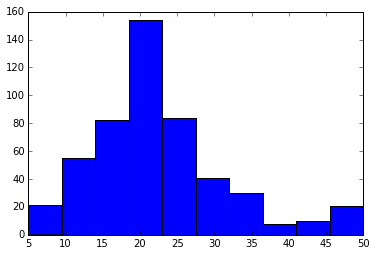

In [20]:
# Number of houses in the dataset
#To initially describe data: 
##print city_data.keys()
##print city_data.feature_names
##city_data.DESCR

#First elelment of #shape from dataset is number of rows
total_houses = housing_features.shape[0]

# Number of features in the dataset
total_features = housing_features.shape[1]

# Minimum housing value in the dataset
minimum_price = np.amin(housing_prices)

# Maximum housing value in the dataset
maximum_price = np.amax(housing_prices)

# Mean house value of the dataset
mean_price = np.mean(housing_prices)

# Median house value of the dataset
median_price = np.median(housing_prices)

# Standard deviation of housing values of the dataset
std_dev = np.std(housing_prices)

# Histogram of house prices
pl.hist(housing_prices)

# Show the calculated statistics
print "Boston Housing dataset statistics (in $1000's):\n"
print "Total number of houses:", total_houses
print "Total number of features:", total_features
print "Minimum house price:", minimum_price
print "Maximum house price:", maximum_price
print "Mean house price: {0:.3f}".format(mean_price)
print "Median house price:", median_price
print "Standard deviation of house price: {0:.3f}".format(std_dev)

## Question 1
As a reminder, you can view a description of the Boston Housing dataset [here](https://archive.ics.uci.edu/ml/datasets/Housing), where you can find the different features under **Attribute Information**. The `MEDV` attribute relates to the values stored in our `housing_prices` variable, so we do not consider that a feature of the data.

*Of the features available for each data point, choose three that you feel are significant and give a brief description for each of what they measure.*

**Answer: **

Three significant features from those in the dataset:
1. RM: average number of rooms per dwelling 
This seems to indicate the number of rooms within a sampled house.
2. CRIM: per capita crime rate by town
This is a measure of the crime rate per capita in the town where a sampled house is located.
3. INDUS: proportion of non-retail business acres per town 
This is a measure of the share of total acres in the town occupied by non-retail businesses.

##Question 2
*Using your client's feature set `CLIENT_FEATURES`, which values correspond with the features you've chosen above?*  

In [21]:
print CLIENT_FEATURES

[[11.95, 0.0, 18.1, 0, 0.659, 5.609, 90.0, 1.385, 24, 680.0, 20.2, 332.09, 12.13]]


**Answer: **

The client's house has the following values for the features selected above:

1. RM: 5.609 (rooms per dwelling in town)

2. CRIM: 11.95 (incidents per capita)

3. INDUS: 18.1 (% of town occupied by non-retail businesses)

# Evaluating Model Performance
In this second section of the project, you will begin to develop the tools necessary for a model to make a prediction. Being able to accurately evaluate each model's performance through the use of these tools helps to greatly reinforce the confidence in your predictions.

## Step 2
In the code block below, you will need to implement code so that the `shuffle_split_data` function does the following:
- Randomly shuffle the input data `X` and target labels (housing values) `y`.
- Split the data into training and testing subsets, holding 30% of the data for testing.

If you use any functions not already acessible from the imported libraries above, remember to include your import statement below as well!  

In [22]:
# Put any import statements you need for this code block here
from sklearn import cross_validation

def shuffle_split_data(X, y):
    """ Shuffles and splits data into 70% training and 30% testing subsets,
        then returns the training and testing subsets. """
    
    # Shuffle and split the data
    splits = cross_validation.ShuffleSplit(len(housing_features),test_size = 0.30,random_state=0)
    for train_index, test_index in splits:
        X_train = np.asarray([housing_features[i] for i in train_index])
        y_train = np.asarray([housing_prices[i] for i in train_index])
        X_test = np.asarray([housing_features[i] for i in test_index])
        y_test = np.asarray([housing_prices[i] for i in test_index])

    # Return the training and testing data subsets
    #, y_train.shape, X_test.shape, y_test.shape
    return X_train, y_train, X_test, y_test
    
# Test shuffle_split_data
try:
    X_train, y_train, X_test, y_test = shuffle_split_data(housing_features, housing_prices)
    print "Successfully shuffled and split the data!"
except:
    print "Something went wrong with shuffling and splitting the data."

Successfully shuffled and split the data!


## Question 4
*Why do we split the data into training and testing subsets for our model?*

**Answer:**


We split the data into training and test sets in order to build models that are validated based on predictions outside the features and labels used for model construction. Validating with data outside a training set gives us more confidence that the models built in the test set would help us make valid label predictions based on other potential features drawn from the sample population.


## Step 3
In the code block below, you will need to implement code so that the `performance_metric` function does the following:
- Perform a total error calculation between the true values of the `y` labels `y_true` and the predicted values of the `y` labels `y_predict`.

You will need to first choose an appropriate performance metric for this problem. See [the sklearn metrics documentation](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) to view a list of available metric functions. **Hint: ** Look at the question below to see a list of the metrics that were covered in the supporting course for this project.

Once you have determined which metric you will use, remember to include the necessary import statement as well!  
Ensure that you have executed the code block once you are done. You'll know the `performance_metric` function is working if the statement *"Successfully performed a metric calculation!"* is printed.

In [23]:
# Put any import statements you need for this code block here
from sklearn.metrics import mean_squared_error, make_scorer

def performance_metric(y_true, y_predict):
    """ Calculates and returns the total error between true and predicted values
        based on a performance metric chosen by the student. """
    error = mean_squared_error(y_true, y_predict)
    return error

# Test performance_metric
try:
    total_error = performance_metric(y_train, y_train)
    print "Successfully performed a metric calculation!"
except:
    print "Something went wrong with performing a metric calculation."

Successfully performed a metric calculation!


## Question 4
*Which performance metric below did you find was most appropriate for predicting housing prices and analyzing the total error. Why?*
- *Accuracy*
- *Precision*
- *Recall*
- *F1 Score*
- *Mean Squared Error (MSE)*
- *Mean Absolute Error (MAE)*

**Answer:**


I see Mean Squared Error (MSE) being the most appropriate performance metric in evaluating our housing price prediction model. The MEDV dependent variable is continuous, not discrete, and our model will need to predict MEDV values using regression, not classification, techniques. This tells us that the Accuracy, Precision, Recall and F1 Score metrics are not valid in this case. 

Of the two other two potential metrics, I chose to employ Mean Squared Error, as the distribution of housing prices for the model is (1) fairly tightly focused, with no major outliers and (2) relatively normal, aside from a very small spike in house prices in the upper end of our value range, $45,000 - 50,000 - which we can see in the price histogram of Step 1.

Mean Absolute Error would potentially be more appropriate if we were looking to build a model that was less sensitive to outlier data points and we didn't want to penalize for large errors the model might generate for predictions far different from these outliers.

I didn't see the benefits of reducing the penalty weights of errors related to outlier predictions, and felt MSE would also be computationally simpler as well, as it requires minimizing a differentiable, not absolute, function.


## Step 4 (Final Step)
In the code block below, you will need to implement code so that the `fit_model` function does the following:
- Create a scoring function using the same performance metric as in **Step 2**. See the [sklearn `make_scorer` documentation](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Build a GridSearchCV object using `regressor`, `parameters`, and `scoring_function`. See the [sklearn documentation on GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

When building the scoring function and GridSearchCV object, *be sure that you read the parameters documentation thoroughly.* It is not always the case that a default parameter for a function is the appropriate setting for the problem you are working on.

Since you are using `sklearn` functions, remember to include the necessary import statements below as well!  
Ensure that you have executed the code block once you are done. You'll know the `fit_model` function is working if the statement *"Successfully fit a model to the data!"* is printed.

In [25]:
# Put any import statements you need for this code block
import sklearn
from sklearn import grid_search
from sklearn.tree import DecisionTreeRegressor

def fit_model(X, y):
    """ Tunes a decision tree regressor model using GridSearchCV on the input data X 
        and target labels y and returns this optimal model. """

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Set up the parameters we wish to tune
    parameters = {'max_depth':(1,2,3,4,5,6,7,8,9,10)}

    # Make an appropriate scoring function
    scoring_function = make_scorer(mean_squared_error, greater_is_better=False)

    # Make the GridSearchCV object
    reg = grid_search.GridSearchCV(estimator = regressor, param_grid = parameters, scoring = scoring_function)
    # Fit the learner to the data to obtain the optimal model with tuned parameters
    reg.fit(X, y)

    # Return the optimal model
    return reg.best_estimator_

# Test fit_model on entire dataset
try:
    reg = fit_model(housing_features, housing_prices)
    print "Successfully fit a model!"
except:
    print "Something went wrong with fitting a model."

Successfully fit a model!


## Question 5
*What is the grid search algorithm and when is it applicable?*

**Answer: **


The grid search algorithm evaluates a given model for specified values of given parameters and determines the parameter values yielding the most accurate predictions. For example, in the previous section, we were using the grid search algorithm to test our Decision Tree Regressor predictions for 10 different values of 'max_depth', and select the 'max_depth' value yielding the lowest mean squared error for predicted values. The grid search algorithm is applicable in cases where a classifier or regressor takes arguments determining key features of the model (e.g. - not applicable for Naive Bayesian Classifiers).

## Question 6
*What is cross-validation, and how is it performed on a model? Why would cross-validation be helpful when using grid search?*

**Answer: **


Cross validation is the evaluation of a model by sampling feature and label data from a data set for training and testing with numerous 'folds', and optimizing the model using the performance metrics from model training and testing for each random split of training and testing data. 

Cross validation improves on model evaluation for a simple train/test split by obtaining multiple random splits, then measuring overall model performance based on the average errors produced by the model in predicting label values from the test set over all randomly split versions of the dataset.

Evaluating a model for its performance on many randomly selected train/test subsets within the dataset has many advantages, including:

1. **Preventing model overfitting** - models generated and assessed based on a single train / test split could be optimized to be very predictive for that given split test set, but poorly generalize to predictions from the larger data set or future data points from the population studied. Cross validating allows us to evaluate our models based on performance over many test and training subsets, providing more confidence that our model predictions can generalize with strong predictive accuracy for any data points from the studied population.
<br>
<br>
2. **Making better use of limited data** - to construct a more predictive model, we want to maximize the number of data points in the test and training sets. Cross validation allows us to essentially grow the data points available for both groups, relative to the number available from a single test/train split, by 're-using' data points in various randomly selected subsets for training and testing.

Cross-validation is useful for the grid search algorithm, because it provides enhanced measures of model performance for parameter values tested in the grid. Without cross-validation - instead using a single test/training split for performance evaluation, grid search would potentially identify 'optimal' feature values selected for an overfit, and not generalizable, model, or a model with less predictive power.

# Checkpoint!
You have now successfully completed your last code implementation section. Pat yourself on the back! All of your functions written above will be executed in the remaining sections below, and questions will be asked about various results for you to analyze. To prepare the **Analysis** and **Prediction** sections, you will need to intialize the two functions below. Remember, there's no need to implement any more code, so sit back and execute the code blocks! Some code comments are provided if you find yourself interested in the functionality.

In [26]:
def learning_curves(X_train, y_train, X_test, y_test):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing error rates for each model are then plotted. """
    
    print "Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . ."
    
    # Create the figure window
    fig = pl.figure(figsize=(10,8))

    # We will vary the training set size so that we have 50 different sizes
    sizes = np.round(np.linspace(1, len(X_train), 50))
    train_err = np.zeros(len(sizes))
    test_err = np.zeros(len(sizes))

    # Create four different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        for i, s in enumerate(sizes):
            
            # Setup a decision tree regressor so that it learns a tree with max_depth = depth
            regressor = DecisionTreeRegressor(max_depth = depth)

            # Fit the learner to the training data
            regressor.fit(X_train[:s], y_train[:s])

            # Find the performance on the training set
            train_err[i] = performance_metric(y_train[:s], regressor.predict(X_train[:s]))
            
            # Find the performance on the testing set
            test_err[i] = performance_metric(y_test, regressor.predict(X_test))

        # Subplot the learning curve graph
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, test_err, lw = 2, label = 'Testing Error')
        ax.plot(sizes, train_err, lw = 2, label = 'Training Error')
        ax.legend()
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Data Points in Training Set')
        ax.set_ylabel('Total Error')
        ax.set_xlim([0, len(X_train)])
    
    # Visual aesthetics
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=18, y=1.03)
    fig.tight_layout()
    fig.show()

In [27]:
def model_complexity(X_train, y_train, X_test, y_test):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    print "Creating a model complexity graph. . . "

    # We will vary the max_depth of a decision tree model from 1 to 14
    max_depth = np.arange(1, 14)
    train_err = np.zeros(len(max_depth))
    test_err = np.zeros(len(max_depth))

    for i, d in enumerate(max_depth):
        # Setup a Decision Tree Regressor so that it learns a tree with depth d
        regressor = DecisionTreeRegressor(max_depth = d)

        # Fit the learner to the training data
        regressor.fit(X_train, y_train)

        # Find the performance on the training set
        train_err[i] = performance_metric(y_train, regressor.predict(X_train))

        # Find the performance on the testing set
        test_err[i] = performance_metric(y_test, regressor.predict(X_test))

    # Plot the model complexity graph
    pl.figure(figsize=(7, 5))
    pl.title('Decision Tree Regressor Complexity Performance')
    pl.plot(max_depth, test_err, lw=2, label = 'Testing Error')
    pl.plot(max_depth, train_err, lw=2, label = 'Training Error')
    pl.legend()
    pl.xlabel('Maximum Depth')
    pl.ylabel('Total Error')
    pl.show()

# Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing error rates on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `max_depth` parameter on the full training set to observe how model complexity affects learning and testing errors. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

Creating learning curve graphs for max_depths of 1, 3, 6, and 10. . .


/Users/burnssa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/burnssa/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


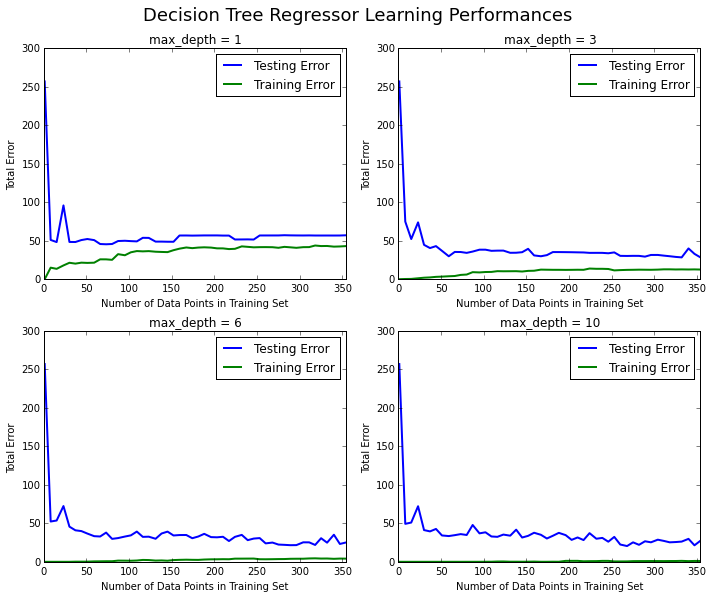

In [28]:
learning_curves(X_train, y_train, X_test, y_test)

## Question 7
*Choose one of the learning curve graphs that are created above. What is the max depth for the chosen model? As the size of the training set increases, what happens to the training error? What happens to the testing error?*

**Answer: **


Looking at chart 2 (top right hand corner) - the Max Depth is 3.


With growing training set size, the mean squared error value from the training set gradually increases to what seems to be a horizontal asymptote around 20 or so.


As the training set size grows from 0 to 50, the mean squared error value for the test set rapidly decreases to around 40. With further increases in the training data set size, the error value falls slightly to a 'bumpy' asymptote that seems to be a bit below 40.

## Question 8
*Look at the learning curve graphs for the model with a max depth of 1 and a max depth of 10. When the model is using the full training set, does it suffer from high bias or high variance when the max depth is 1? What about when the max depth is 10?*

**Answer: **


When max_depth is 1, the model suffers from substantial bias, as errors for the training and test sets converge with increasingly large numbers of data points, but at a relatively high error level. 


With a 'max_depth' of 10, the model suffers much less from bias, as both training and test set error levels are much lower than those where 'max_depth' is 1 when we have sufficiently many data points in the training set. The larger 'max_depth' model does, however, also suffer from greater variance than the model with a small 'max_depth', with a larger gap between training and testing error for larger numbers of data points. 

Creating a model complexity graph. . . 


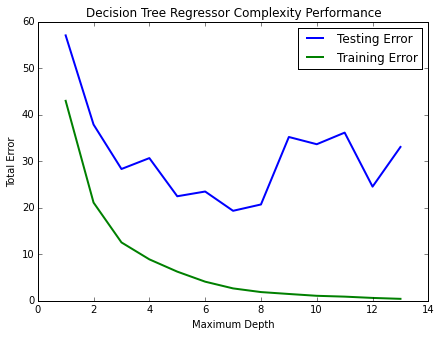

In [29]:
model_complexity(X_train, y_train, X_test, y_test)

## Question 9
*From the model complexity graph above, describe the training and testing errors as the max depth increases. Based on your interpretation of the graph, which max depth results in a model that best generalizes the dataset? Why?*

**Answer: **

In the chart, both training and testing error levels fall rapidly as the 'max_depth' parameter increases from 1 to 4. As the maximum depth parameter is increased beyond 4, training error continues to decrease (at a less rapid rate), but testing error bounces around and only slightly falls for some larger maximum depth values.


Based on the model complexity chart, it looks like a maximum depth of 4 yields a model that best generalizes the dataset. 


At a maximum depth of 4, the total testing error level is relatively small (indicating low model bias) and this measure is only slightly improved with larger maximum depth parameter values. We would also like to minimize model complexity, controlling for predictive accuracy. Thus it is preferable retain a maximum depth of 4, instead of raising model complexity without marked improvements in model performance.

# Model Prediction
In this final section of the project, you will make a prediction on the client's feature set using an optimized model from `fit_model`. When applying grid search along with cross-validation to optimize your model, it would typically be performed and validated on a training set and subsequently evaluated on a **dedicated test set**. In this project, the optimization below is performed on the *entire dataset* (as opposed to the training set you made above) due to the many outliers in the data. Using the entire dataset for training provides for a less volatile prediction at the expense of not testing your model's performance. 

*To answer the following questions, it is recommended that you run the code blocks several times and use the median or mean value of the results.*

## Question 10
*Using grid search on the entire dataset, what is the optimal `max_depth` parameter for your model? How does this result compare to your intial intuition?*  
**Hint: ** Run the code block below to see the max depth produced by your optimized model.

In [30]:
print "Final model has an optimal max_depth parameter of", reg.get_params()['max_depth']

Final model has an optimal max_depth parameter of 4


**Answer: **


As suggested by a interpretation of the complexity graph, the grid search algorithm finds the optimal maximum depth parameter to be 4.


This matches my intiuition, as it seems to ensure a model that generalize the dataset with low bias (lower overall testing error) and low variance (smaller gap between training and testing error).

## Question 11
*With your parameter-tuned model, what is the best selling price for your client's home? How does this selling price compare to the basic statistics you calculated on the dataset?*  

**Hint: ** Run the code block below to have your parameter-tuned model make a prediction on the client's home.

In [31]:
sale_price = reg.predict(CLIENT_FEATURES)
print "Predicted value of client's home: {0:.3f}".format(sale_price[0])

Predicted value of client's home: 21.630


**Answer:**


The predicted selling price of a client's home, based on our model, with the feature values identified in Question 2 is $21,630. 


This is very close to the median value of all homes in the dataset: \$21,200 and slightly below the mean house value for the dataset: \$22,533.


I'm not sure whether our predicted home price is the 'best' sale price for my client, as I may like to increase the sale value in order to please my client and earn a higher commission, but this is the value that is predicted by the model given the data available.

## Question 12 (Final Question):

*In a few sentences, discuss whether you would use this model or not to predict the selling price of future clients' homes in the Greater Boston area.*

**Answer: **


I would potentially consider using the model here for generating baseline estimates of house sale values for new clients, provided that I was confident about affirmative answers to the questions below.

- **Do other features of the house's region (other than those used in the model) or physical characteristics roughly resemble those from the dataset?**  
If there are characteristics of the house that are much different from those sampled for dataset, I may not be sure that we could consider this house as part of our 'housing population' for the model, and would not be confident about whether we can accurately generalize model predictions to the house. Certain features excluded from the dataset (e.g. a spectactular view) could have a substantial impact on selling value. 


- **Have labels (median home price) and feature values for the dataset been updated recently?**
If I am using the model to project home prices in the future, I want to ensure that both feature and label values are recent. Otherwise the estimates of current sale value may be inaccurate. 


- **Are there no cost-effective ways to obtain a richer dataset?**
If I could more easily incorporate more predictive features and more data points in the dataset (reducing mean squared error for test set runs), I may choose to do so - potentially re-tuning the model as part of the exercise.